# Fake News Detection Using Decison Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
#To just ignore warnings that we come across during model creation, just import warnings and set it to ignore.

In [2]:
df = pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
df.shape

(6335, 4)

In [5]:
df.isnull().sum() #there are no null values

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) #dropping the Unnamed column as we have no use of it

<Axes: xlabel='label', ylabel='count'>

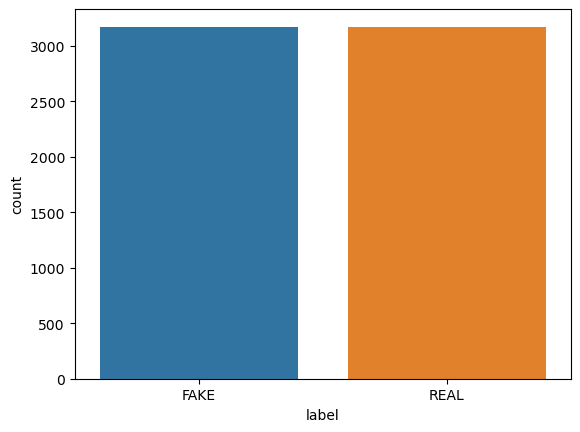

In [8]:
sns.countplot(x=df['label'])

We will now define a and y,
x will contain all the independent features and y will contain all the independent features which are labelled.

In [9]:
x = df.iloc[ : , :-1].values #selecting all the rows except last row
y = df.iloc[ : , -1].values #selecting all the rows and only last column

In [19]:
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [11]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


Fit_transform is used on the training dataset because it will scale our training data and learn the scaling parameters. With this, our model will learn the mean and variance of the features that are there in this training dataset. These parameters are used to work with test data

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english",max_features=1000)
x1=vect.fit_transform(x[:,0]).todense()
x2=vect.fit_transform(x[:,1]).todense()
x_mat=np.hstack((x1,x2))

numpy.matrix

In [27]:
x_mat = np.asarray(x_mat) #converting numpy matrix to numpy array as it wont support matrix while model predicting

In [28]:
x_mat

array([[0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_mat,y,random_state=1000)

Import DecisionTreeClassifier and set criterion to entropy so that our model will build a decision tree taking entropy as criteria and assigning it to a variable called a model. So from now on whenever we need to use DecisionTreeClassifier(criterion=”entropy”), we just have to use the model.

In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array(['FAKE', 'REAL', 'REAL', ..., 'REAL', 'REAL', 'REAL'], dtype=object)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 79.61


In [35]:
confusion_matrix(y_pred,y_test)

array([[626, 168],
       [155, 635]], dtype=int64)